In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, f1_score

In [3]:
data = pd.read_csv('data_paper.csv')

In [4]:
data.dropna(inplace=True,axis=1)
data

,abnormal_x_arm,abnormal_y_arm,abnormal_z_arm,abnormal_norm_arm,abnormal_x_neck,abnormal_y_neck,abnormal_z_neck,abnormal_norm_neck,abnormal_x_waist,abnormal_y_waist,...,norm_neck_8v,norm_neck_12v,norm_neck_16v,norm_neck_20v,PWR_4v,PWR_8v,PWR_12v,PWR_16v,PWR_20v,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.159970,0.145609,0.171796,0.144968,4.769310e+11,2.612510e+11,1.996700e+11,1.573690e+11,1.278690e+11,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143698,0.138915,0.163555,0.139338,3.778760e+11,2.614330e+11,1.987730e+11,1.560480e+11,1.271690e+11,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.131188,0.163806,0.159095,0.142911,2.440730e+11,2.632010e+11,1.981960e+11,1.550200e+11,1.263300e+11,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.176559,0.212941,0.159972,0.143349,3.503680e+11,2.744400e+11,1.982230e+11,1.515200e+11,1.230540e+11,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133755,0.177974,0.141997,0.127104,1.074830e+11,6.774848e+10,4.688410e+10,3.500406e+10,2.826888e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0.000011,0.000018,0.000025,0.000007,0.000004,0.000198,0.000026,0.000004,0.000002,0.000201,...,0.182444,0.196728,0.168757,0.177743,1.152974e+10,6.581755e+09,4.654608e+09,3.772901e+09,3.137504e+09,2
1351,0.000011,0.000018,0.000024,0.000007,0.000004,0.000196,0.000024,0.000004,0.000002,0.000198,...,0.228574,0.217044,0.172748,0.183007,1.130189e+10,6.164726e+09,4.404762e+09,3.669394e+09,3.637988e+09,1
1352,0.000012,0.000018,0.000023,0.000007,0.000004,0.000194,0.000023,0.000004,0.000002,0.000198,...,0.220149,0.210435,0.172488,0.189181,2.867315e+09,1.973460e+09,1.839776e+09,1.884353e+09,2.108205e+09,1
1353,0.000012,0.000018,0.000023,0.000007,0.000004,0.000192,0.000021,0.000004,0.000002,0.000197,...,0.223996,0.214336,0.173289,0.191631,3.092645e+09,2.421045e+09,1.882869e+09,1.768542e+09,2.263221e+09,1


In [5]:
X = data.drop(['label'],axis=1)
y = data['label']

In [6]:
(X_train, X_test, y_train, y_test) = train_test_split(X,y,test_size=0.2, shuffle=False , random_state=0)

In [7]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [8]:
params = {
    'n_estimators':[10, 15, 20, 100, 200 ,300, 500],
    'max_depth':[16, 32, 64, 100, 200],
    'min_samples_leaf':[8,16, 24, 48, 96, 192],
    'min_samples_split':[8,16,20, 40, 60, 90, 180]
}

In [14]:
grid_cv = GridSearchCV(rf, param_grid=params, cv=4, n_jobs=-1)
grid_cv.fit(X_train, y_train)



GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [16, 32, 64, 100, 200],
                         'min_samples_leaf': [8, 16, 24, 48, 96, 192],
                         'min_samples_split': [8, 16, 20, 40, 60, 90, 180],
                         'n_estimators': [10, 15, 20, 100, 200, 300, 500,
                                          1000]})

In [9]:
rf_1 = RandomForestClassifier(max_depth=16, min_samples_leaf=48, min_samples_split=180,
                       n_estimators=500, n_jobs=-1, random_state=0)

In [10]:
rf_1.fit(X_train, y_train)

RandomForestClassifier(max_depth=16, min_samples_leaf=48, min_samples_split=180,
                       n_estimators=500, n_jobs=-1, random_state=0)

In [15]:
print('最適ハイパーパラメータ :',grid_cv.best_params_)
print('最適精度 :',grid_cv.best_score_)

最適ハイパーパラメータ : {'max_depth': 16, 'min_samples_leaf': 48, 'min_samples_split': 180, 'n_estimators': 500}
最適精度 : 0.44095940959409596


In [16]:
estimator = grid_cv.best_estimator_
estimator.fit(X_train, y_train)



RandomForestClassifier(max_depth=16, min_samples_leaf=48, min_samples_split=180,
                       n_estimators=500, n_jobs=-1, random_state=0)

In [123]:
pred = estimator.predict(X_test)
pred_1 = estimator.predict(X)
print('精度:{0:.4f}'.format(accuracy_score(y_test,pred)))
print('精度_原本全体:{0:.4f}'.format(accuracy_score(y,pred_1)))

精度:0.4096
精度_原本全体:0.5446


In [11]:
pred_temp = rf_1.predict(X_test)
pred_temp1 = rf_1.predict(X)


In [48]:
f1_score_ = f1_score(y_test, pred_temp, average='macro')
f1_score1 = f1_score(y, pred_temp1, average='macro')
print('f1_score:' + str(f1_score_))
print('f1_score_original:' + str(f1_score_))

f1_score:0.28012092165146535
f1_score_original:0.28012092165146535


In [18]:
# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],estimator.feature_importances_[i])

abnormal_x_arm 0.014108184380355122
abnormal_y_arm 0.012009912921296906
abnormal_z_arm 0.05659726944047469
abnormal_norm_arm 0.008688954080355383
abnormal_x_neck 0.012672079183335173
abnormal_y_neck 0.02743872023347541
abnormal_z_neck 0.010650498748973745
abnormal_norm_neck 0.005618725538908426
abnormal_x_waist 0.004908790578535292
abnormal_y_waist 0.014758537559677992
abnormal_z_waist 0.008558859482472855
abnormal_norm_waist 0.006614067139306229
abnormal_PWR 0.030106828636047425
abnormal_HR 0.04658815265180333
x_mean_arm 0.0019517896374399678
y_mean_arm 0.0026852941399249514
z_mean_arm 0.0022802017846997313
norm_arm 0.0019084776825532442
x_mean_neck 0.004880135069766264
y_mean_neck 0.004195154738049486
z_mean_neck 0.0045353842775655885
norm_neck 0.0028009540977363195
PWR 0.003985592573249236
HR 0.009320482840978668
x_mean_arm_1 0.0001959877903854143
y_mean_arm_1 0.0004942442800798451
z_mean_arm_1 0.0010761338777285536
norm_arm_1 0.003535131439909702
x_mean_neck_1 0.0
y_mean_neck_1 0.0

In [19]:
import sys
import time

program_start = time.time()
now = str(int(program_start))

df = pd.DataFrame(estimator.feature_importances_)
df.to_csv("feature_importances"+ now +".csv")

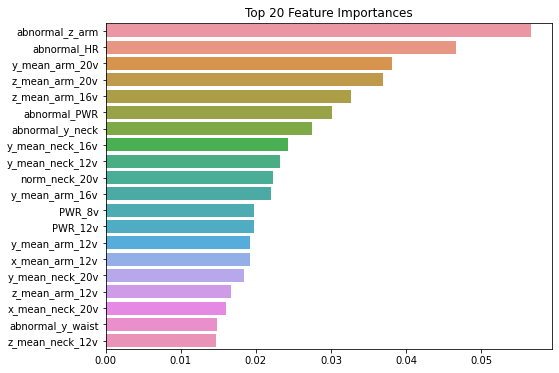

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = estimator.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

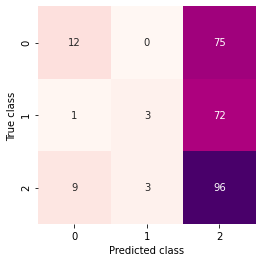

In [21]:
# 混同行列を作成
matrix = confusion_matrix(y_test, pred)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [4]:
data1 = pd.read_csv("data_paper_abced_edit.csv")
data1.dropna(inplace=True,axis=1)



X1 = data1.drop(['label'],axis=1)
y1 = data1['label']



In [5]:
X1

,abnormal_x_arm,abnormal_y_arm,abnormal_z_arm,abnormal_norm_arm,abnormal_x_neck,abnormal_y_neck,abnormal_z_neck,abnormal_norm_neck,abnormal_x_waist,abnormal_y_waist,...,norm_neck_4v,norm_neck_8v,norm_neck_12v,norm_neck_16v,norm_neck_20v,PWR_4v,PWR_8v,PWR_12v,PWR_16v,PWR_20v
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.154616,0.159970,0.145609,0.171796,0.144968,4.770000e+11,2.610000e+11,2.000000e+11,1.570000e+11,1.280000e+11
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.161628,0.143698,0.138915,0.163555,0.139338,3.780000e+11,2.610000e+11,1.990000e+11,1.560000e+11,1.270000e+11
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079064,0.131188,0.163806,0.159095,0.142911,2.440000e+11,2.630000e+11,1.980000e+11,1.550000e+11,1.260000e+11
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.225263,0.176559,0.212941,0.159972,0.143349,3.500000e+11,2.740000e+11,1.980000e+11,1.520000e+11,1.230000e+11
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.162958,0.133755,0.177974,0.141997,0.127104,1.070000e+11,6.774848e+10,4.688410e+10,3.500406e+10,2.826888e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0.000046,0.000059,0.000012,0.000005,0.000004,0.000326,0.000232,0.000003,0.000002,0.000784,...,0.131228,0.092951,0.155055,0.145531,0.128530,8.385396e+07,1.187862e+08,8.736466e+07,1.671194e+08,1.954847e+08
1351,0.000047,0.000059,0.000012,0.000005,0.000004,0.000339,0.000209,0.000003,0.000002,0.000741,...,0.052935,0.079397,0.131113,0.124907,0.114379,1.101817e+08,1.134716e+08,1.904535e+08,1.697113e+08,2.226968e+08
1352,0.000048,0.000060,0.000012,0.000005,0.000004,0.000354,0.000191,0.000003,0.000002,0.000730,...,0.049924,0.133339,0.124361,0.129609,0.111823,1.236307e+08,1.092745e+08,1.807943e+08,1.554677e+08,2.145099e+08
1353,0.000048,0.000063,0.000011,0.000005,0.000004,0.000364,0.000176,0.000003,0.000002,0.000734,...,0.035115,0.153628,0.135511,0.133261,0.111059,1.213163e+08,1.047655e+08,2.039204e+08,1.757769e+08,2.144633e+08


In [6]:
(X1_train, X1_test, y1_train, y1_test) = train_test_split(X1,y1,test_size=0.2, shuffle=False , random_state=0)

In [41]:
rf1 = RandomForestClassifier(random_state=0, n_jobs=-1)

In [44]:
grid_cv1 = GridSearchCV(rf1, param_grid=params, cv=4, n_jobs=-1)
grid_cv1.fit(X1_train, y1_train)

print('最適ハイパーパラメータ :',grid_cv1.best_params_)
print('最適精度 :',grid_cv1.best_score_)

最適ハイパーパラメータ : {'max_depth': 16, 'min_samples_leaf': 48, 'min_samples_split': 8, 'n_estimators': 20}
最適精度 : 0.4261992619926199


In [7]:
rf1_1 = RandomForestClassifier(max_depth=16, min_samples_leaf= 48, min_samples_split= 8, n_estimators=20, random_state=0, n_jobs=-1)

In [9]:
estimator1 = rf1_1
estimator1.fit(X1_train, y1_train)

pred1 = estimator1.predict(X1_test)
print('精度:{0:.4f}'.format(accuracy_score(y1_test,pred1)))

#pred1_1 = estimator1.predict(X_test)
#print('精度_原本:{0:.4f}'.format(accuracy_score(y_test,pred1_1)))

#pred1_2 = estimator1.predict(X)
#print('精度_原本_全体:{0:.4f}'.format(accuracy_score(y,pred1_2)))

##copy

精度:0.6716


In [21]:
estimator1 = rf1_1
estimator1.fit(X1_train, y1_train)

pred1 = estimator1.predict(X1_test)
print('精度:{0:.4f}'.format(accuracy_score(y1_test,pred1)))

pred1_1 = estimator1.predict(X_test)
print('精度_原本:{0:.4f}'.format(accuracy_score(y_test,pred1_1)))

pred1_2 = estimator1.predict(X)
print('精度_原本_全体:{0:.4f}'.format(accuracy_score(y,pred1_2)))

精度:0.4096
精度_原本:0.6162
精度_原本_全体:0.5970


In [47]:
f1_score_1 = f1_score(y1_test,pred1, average='macro')
print('f1_score:' + str(f1_score_1))
f1_score_1_1 = f1_score(y_test,pred1_1, average='micro')
print('f1_score_original:' + str(f1_score_1_1))
f1_score_1_2 = f1_score(y,pred1_2, average='micro')
print('f1_score_original:' + str(f1_score_1_2))


f1_score:0.36338432507500346
f1_score_original:0.6162361623616236
f1_score_original:0.5970479704797048


In [52]:
import sys
import time

# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],estimator1.feature_importances_[i])

program_start = time.time()
now = str(int(program_start))

df1 = pd.DataFrame(estimator1.feature_importances_)
df1.to_csv("feature_importances"+ now +".csv")



abnormal_x_arm 0.01890462131749681
abnormal_y_arm 0.009540148216127437
abnormal_z_arm 0.039320102819181205
abnormal_norm_arm 0.004726723278221015
abnormal_x_neck 0.016826186057618642
abnormal_y_neck 0.010164909238500209
abnormal_z_neck 0.003949445814548342
abnormal_norm_neck 0.005347473803082713
abnormal_x_waist 0.0205279051755183
abnormal_y_waist 0.02059251453159968
abnormal_z_waist 0.017650000052663616
abnormal_norm_waist 0.0035471384675377256
abnormal_PWR 0.03202889516406692
abnormal_HR 0.061791517161870965
x_mean_arm 0.003818317585440207
y_mean_arm 0.007677426181314678
z_mean_arm 0.010263391880866574
norm_arm 0.0
x_mean_neck 0.010876862543289382
y_mean_neck 0.009744621164449824
z_mean_neck 0.0
norm_neck 0.004487106914324596
PWR 0.0027717164982627796
HR 0.004086243205821212
x_mean_arm_1 0.0
y_mean_arm_1 0.005726122200314284
z_mean_arm_1 0.0
norm_arm_1 0.0
x_mean_neck_1 0.0
y_mean_neck_1 0.0
z_mean_neck_1 0.0
norm_neck_1 0.0
x_mean_neck_1.1 0.0
y_mean_neck_1.1 0.0
z_mean_neck_1.1 0.0

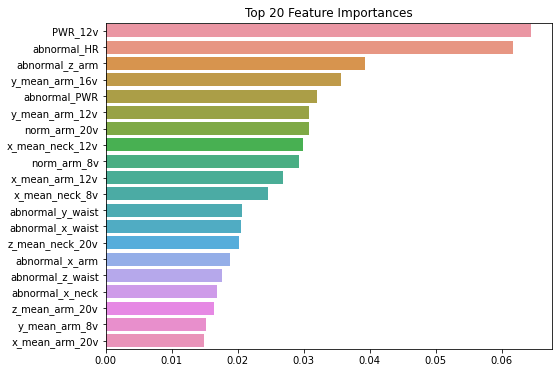

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = estimator1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()



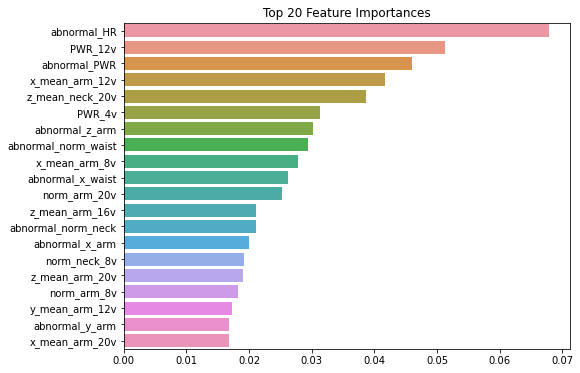

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = estimator1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X1_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()


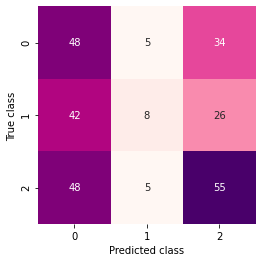

In [54]:
# 混同行列を作成
matrix = confusion_matrix(y1_test, pred1)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()


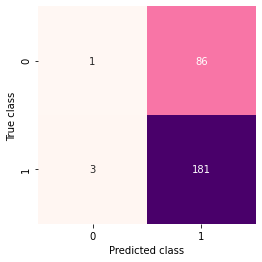

In [12]:
# 混同行列を作成
matrix = confusion_matrix(y1_test, pred1)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()


In [23]:
data3 = pd.read_csv("data_paper_abedc.csv")
data3.dropna(inplace=True,axis=1)

X3 = data3.drop(['label'],axis=1)
y3 = data3['label']

In [58]:
data3

,abnormal_x_arm,abnormal_y_arm,abnormal_z_arm,abnormal_norm_arm,abnormal_x_neck,abnormal_y_neck,abnormal_z_neck,abnormal_norm_neck,abnormal_x_waist,abnormal_y_waist,...,norm_neck_8v,norm_neck_12v,norm_neck_16v,norm_neck_20v,PWR_4v,PWR_8v,PWR_12v,PWR_16v,PWR_20v,label
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.159970,0.145609,0.171796,0.144968,4.769310e+11,2.612510e+11,1.996700e+11,1.573690e+11,1.278690e+11,0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.143698,0.138915,0.163555,0.139338,3.778760e+11,2.614330e+11,1.987730e+11,1.560480e+11,1.271690e+11,0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.131188,0.163806,0.159095,0.142911,2.440730e+11,2.632010e+11,1.981960e+11,1.550200e+11,1.263300e+11,0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.176559,0.212941,0.159972,0.143349,3.503680e+11,2.744400e+11,1.982230e+11,1.515200e+11,1.230540e+11,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133755,0.177974,0.141997,0.127104,1.074830e+11,6.774848e+10,4.688410e+10,3.500406e+10,2.826888e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0.000009,0.000007,0.000011,0.000005,0.000014,0.000067,0.000031,0.000004,0.000001,0.000016,...,0.106019,0.103251,0.122632,0.144627,2.696390e+10,1.248567e+10,8.307830e+09,6.581081e+09,5.389642e+09,2
1351,0.000008,0.000006,0.000011,0.000005,0.000015,0.000064,0.000031,0.000004,0.000001,0.000017,...,0.079741,0.088498,0.097990,0.132637,2.096557e+09,9.337815e+08,9.961241e+08,8.920312e+08,8.227233e+08,1
1352,0.000008,0.000005,0.000011,0.000005,0.000015,0.000062,0.000028,0.000004,0.000001,0.000017,...,0.088210,0.092061,0.099441,0.137330,1.836998e+09,8.138328e+08,9.528205e+08,8.534167e+08,8.478908e+08,1
1353,0.000007,0.000004,0.000011,0.000005,0.000016,0.000058,0.000027,0.000005,0.000001,0.000017,...,0.088469,0.105104,0.134975,0.134402,1.587182e+09,9.375123e+08,9.125797e+08,8.202227e+08,8.252073e+08,1


In [24]:
(X3_train, X3_test, y3_train, y3_test) = train_test_split(X3,y3,test_size=0.2, shuffle=False , random_state=0)

In [60]:
rf3 = RandomForestClassifier(random_state=0, n_jobs=-1)

In [61]:
print(X3_test)

      abnormal_x_arm  abnormal_y_arm  abnormal_z_arm  abnormal_norm_arm  \
1084        0.000000        0.000000        0.000000           0.000000   
1085        0.000000        0.000000        0.000000           0.000000   
1086        0.000000        0.000000        0.000000           0.000000   
1087        0.000000        0.000000        0.000000           0.000000   
1088        0.000000        0.000000        0.000000           0.000000   
...              ...             ...             ...                ...   
1350        0.000009        0.000007        0.000011           0.000005   
1351        0.000008        0.000006        0.000011           0.000005   
1352        0.000008        0.000005        0.000011           0.000005   
1353        0.000007        0.000004        0.000011           0.000005   
1354        0.000007        0.000004        0.000011           0.000005   

      abnormal_x_neck  abnormal_y_neck  abnormal_z_neck  abnormal_norm_neck  \
1084         0.00000

In [65]:
grid_cv3 = GridSearchCV(rf3, param_grid=params, cv=4, n_jobs=-1)
grid_cv3.fit(X3_train, y3_train)

print('最適ハイパーパラメータ :',grid_cv3.best_params_)
print('最適精度 :',grid_cv3.best_score_)

最適ハイパーパラメータ : {'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 180, 'n_estimators': 20}
最適精度 : 0.43726937269372695


In [25]:
rf3_1 = RandomForestClassifier(max_depth=16, min_samples_leaf= 16, min_samples_split= 180, n_estimators=20, random_state=0, n_jobs=-1)

In [26]:
estimator3 = rf3_1 
estimator3.fit(X3_train, y3_train)

pred3 = estimator3.predict(X3_test)
print('精度:{0:.4f}'.format(accuracy_score(y3_test,pred3)))

pred3_1 = estimator3.predict(X_test)
print('精度_原本:{0:.4f}'.format(accuracy_score(y_test,pred3_1)))

pred3_2 = estimator3.predict(X)
print('精度_原本全体:{0:.4f}'.format(accuracy_score(y,pred3_2)))

精度:0.4133
精度_原本:0.6052
精度_原本全体:0.5845


In [46]:
f1_score_3 = f1_score(y3_test,pred3, average='macro')
print('f1_score:' + str(f1_score_3))
f1_score_3_1 = f1_score(y_test,pred3_1, average='micro')
print('f1_score_original:' + str(f1_score_3_1))
f1_score_3_2 = f1_score(y,pred3_2, average='micro')
print('f1_score_origina_full:' + str(f1_score_3_2))

f1_score:0.3470850833231693
f1_score_original:0.6051660516605166
f1_score_origina_full:0.5845018450184502


In [69]:
import sys
import time

# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],estimator3.feature_importances_[i])

program_start = time.time()
now = str(int(program_start))

df3 = pd.DataFrame(estimator3.feature_importances_)
df3.to_csv("feature_importances"+ now +".csv")

abnormal_x_arm 0.024052885940082744
abnormal_y_arm 0.04214860050769691
abnormal_z_arm 0.03683828106620997
abnormal_norm_arm 0.0060702267298898835
abnormal_x_neck 0.03698830652940312
abnormal_y_neck 0.03518015484092903
abnormal_z_neck 0.016803391707192316
abnormal_norm_neck 0.00966989090953542
abnormal_x_waist 0.01374359650548319
abnormal_y_waist 0.00510734938307531
abnormal_z_waist 0.018177889155812144
abnormal_norm_waist 0.02165979630641226
abnormal_PWR 0.018222517402500464
abnormal_HR 0.0687079291747086
x_mean_arm 0.01503234018177701
y_mean_arm 0.0034907714085153987
z_mean_arm 0.0
norm_arm 0.0
x_mean_neck 0.0
y_mean_neck 0.004260227821473418
z_mean_neck 0.0
norm_neck 0.0
PWR 0.0
HR 0.006160114564315075
x_mean_arm_1 0.0
y_mean_arm_1 0.0
z_mean_arm_1 0.0
norm_arm_1 0.0
x_mean_neck_1 0.0
y_mean_neck_1 0.00413180694152436
z_mean_neck_1 0.0
norm_neck_1 0.00501802972226698
x_mean_neck_1.1 0.0
y_mean_neck_1.1 0.0
z_mean_neck_1.1 0.0
norm_neck_1.1 0.002235050018676913
PWR_1 0.004373119011996

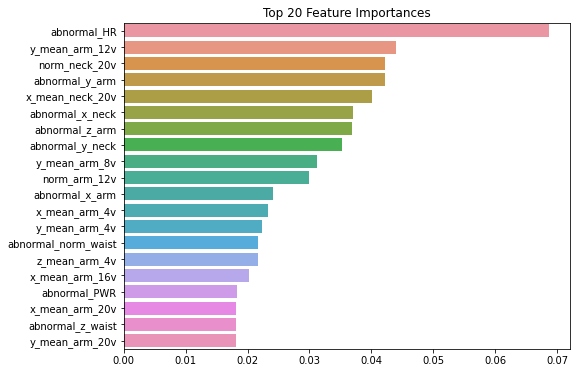

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = estimator3.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

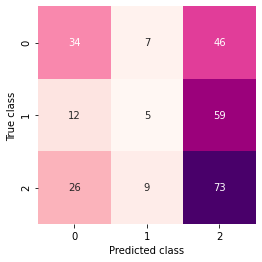

In [73]:
# 混同行列を作成
matrix = confusion_matrix(y3_test, pred3)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

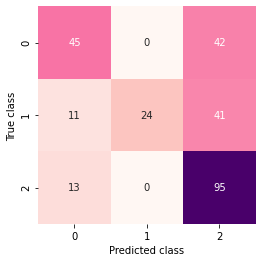

In [74]:
# 混同行列を作成
matrix = confusion_matrix(y_test, pred3_1)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [28]:
data4 = pd.read_csv("data_paper_acedb.csv")
data4.dropna(inplace=True,axis=1)

X4 = data4.drop(['label'],axis=1)
y4 = data4['label']

In [29]:
X4

,abnormal_x_arm,abnormal_y_arm,abnormal_z_arm,abnormal_norm_arm,abnormal_x_neck,abnormal_y_neck,abnormal_z_neck,abnormal_norm_neck,abnormal_x_waist,abnormal_y_waist,...,norm_neck_4v,norm_neck_8v,norm_neck_12v,norm_neck_16v,norm_neck_20v,PWR_4v,PWR_8v,PWR_12v,PWR_16v,PWR_20v
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.154616,0.159970,0.145609,0.171796,0.144968,4.769310e+11,2.612510e+11,1.996700e+11,1.573690e+11,1.278690e+11
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.161628,0.143698,0.138915,0.163555,0.139338,3.778760e+11,2.614330e+11,1.987730e+11,1.560480e+11,1.271690e+11
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.079064,0.131188,0.163806,0.159095,0.142911,2.440730e+11,2.632010e+11,1.981960e+11,1.550200e+11,1.263300e+11
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.225263,0.176559,0.212941,0.159972,0.143349,3.503680e+11,2.744400e+11,1.982230e+11,1.515200e+11,1.230540e+11
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.162958,0.133755,0.177974,0.141997,0.127104,1.074830e+11,6.774848e+10,4.688410e+10,3.500406e+10,2.826888e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,0.015304,0.079975,0.023212,0.000930,0.000258,0.193406,0.001716,0.000063,0.000009,0.001987,...,0.168675,0.182907,0.159647,0.201689,0.167131,7.885327e+09,5.564121e+09,5.161383e+09,4.739781e+09,1.511410e+12
1351,0.015773,0.086588,0.018981,0.000979,0.000257,0.213562,0.001597,0.000059,0.000010,0.001653,...,0.109950,0.172930,0.149969,0.187196,0.232180,7.877127e+09,5.473772e+09,4.981049e+09,4.729743e+09,2.688120e+12
1352,0.016214,0.093431,0.018093,0.001026,0.000255,0.235542,0.001489,0.000055,0.000010,0.001548,...,0.021265,0.139048,0.134510,0.168905,0.249669,4.337926e+09,5.013872e+09,4.944737e+09,5.593330e+11,3.193070e+12
1353,0.016202,0.096706,0.017518,0.001025,0.000251,0.258765,0.001377,0.000051,0.000010,0.001565,...,0.073918,0.139024,0.192829,0.176363,0.318818,9.171045e+09,6.315123e+09,5.075763e+09,1.357520e+12,3.146390e+12


In [30]:
(X4_train, X4_test, y4_train, y4_test) = train_test_split(X4,y4,test_size=0.2, shuffle=False , random_state=0)

In [78]:
rf4 = RandomForestClassifier(random_state=0, n_jobs=-1)

In [79]:
print(X4_test)

      abnormal_x_arm  abnormal_y_arm  abnormal_z_arm  abnormal_norm_arm  \
1084        0.000000        0.000000        0.000000           0.000000   
1085        0.000000        0.000000        0.000000           0.000000   
1086        0.000000        0.000000        0.000000           0.000000   
1087        0.000000        0.000000        0.000000           0.000000   
1088        0.000000        0.000000        0.000000           0.000000   
...              ...             ...             ...                ...   
1350        0.015304        0.079975        0.023212           0.000930   
1351        0.015773        0.086588        0.018981           0.000979   
1352        0.016214        0.093431        0.018093           0.001026   
1353        0.016202        0.096706        0.017518           0.001025   
1354        0.015979        0.097048        0.017247           0.001029   

      abnormal_x_neck  abnormal_y_neck  abnormal_z_neck  abnormal_norm_neck  \
1084         0.00000

In [80]:
grid_cv4 = GridSearchCV(rf4, param_grid=params, cv=4, n_jobs=-1)
grid_cv4.fit(X4_train, y4_train)

print('最適ハイパーパラメータ :',grid_cv4.best_params_)
print('最適精度 :',grid_cv4.best_score_)

最適ハイパーパラメータ : {'max_depth': 16, 'min_samples_leaf': 48, 'min_samples_split': 8, 'n_estimators': 20}
最適精度 : 0.4511070110701107


In [31]:
rf4_1 = RandomForestClassifier(max_depth=16, min_samples_leaf= 48, min_samples_split= 8, n_estimators=20, random_state=0, n_jobs=-1)

In [32]:
estimator4 = rf4_1
estimator4.fit(X4_train, y4_train)

pred4 = estimator4.predict(X4_test)
print('精度:{0:.4f}'.format(accuracy_score(y4_test,pred4)))

pred4_1 = estimator4.predict(X_test)
print('精度_原本:{0:.4f}'.format(accuracy_score(y_test,pred4_1)))

pred4_2 = estimator4.predict(X)
print('精度_原本:{0:.4f}'.format(accuracy_score(y,pred4_2)))

精度:0.2804
精度_原本:0.6531
精度_原本:0.5712


In [45]:
f1_score_4 = f1_score(y4_test,pred4, average='macro')
print('f1_score:' + str(f1_score_4))
f1_score_4_1 = f1_score(y_test,pred4_1, average='macro')
print('f1_score_original:' + str(f1_score_4_1))
f1_score_4_2 = f1_score(y,pred4_2, average='macro')
print('f1_score_original_full:' + str(f1_score_4_2))

f1_score:0.2789524665485505
f1_score_original:0.6266654737777234
f1_score_original_full:0.5465553914963751


In [83]:
import sys
import time

# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],estimator4.feature_importances_[i])

program_start = time.time()
now = str(int(program_start))

df4 = pd.DataFrame(estimator4.feature_importances_)
df4.to_csv("feature_importances"+ now +".csv")

abnormal_x_arm 0.03004780563009695
abnormal_y_arm 0.012062240899180796
abnormal_z_arm 0.029351683375918352
abnormal_norm_arm 0.0
abnormal_x_neck 0.01075377115351934
abnormal_y_neck 0.012676238858166818
abnormal_z_neck 0.013342135169411223
abnormal_norm_neck 0.0
abnormal_x_waist 0.003977647746871244
abnormal_y_waist 0.021604635041677533
abnormal_z_waist 0.017574878832668988
abnormal_norm_waist 0.014296500962210107
abnormal_PWR 0.038807313540797875
abnormal_HR 0.07007047679553782
x_mean_arm 0.0030447508964916484
y_mean_arm 0.0
z_mean_arm 0.009854212406570603
norm_arm 0.0
x_mean_neck 0.004469407363453302
y_mean_neck 0.0033694284154438927
z_mean_neck 0.008585207132787103
norm_neck 0.007410216911666784
PWR 0.0
HR 0.014412339989189333
x_mean_arm_1 0.0
y_mean_arm_1 0.0
z_mean_arm_1 0.0
norm_arm_1 0.0
x_mean_neck_1 0.0
y_mean_neck_1 0.0
z_mean_neck_1 0.0
norm_neck_1 0.0
x_mean_neck_1.1 0.0
y_mean_neck_1.1 0.0
z_mean_neck_1.1 0.0
norm_neck_1.1 0.0
PWR_1 0.005134292396959692
HR_1 0.0
x_mean_arm_

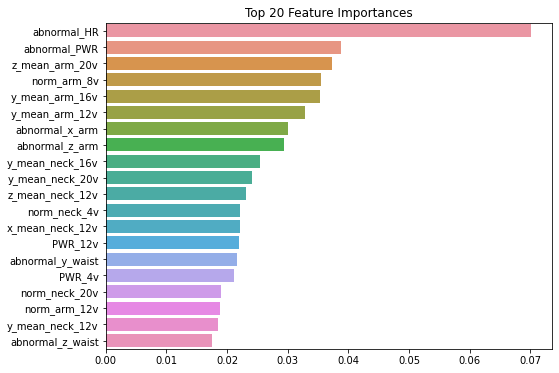

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = estimator4.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

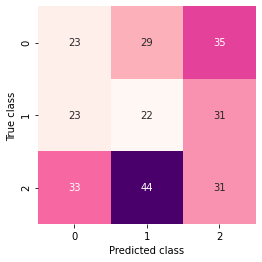

In [85]:
# 混同行列を作成
matrix = confusion_matrix(y4_test, pred4)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [34]:
data5 = pd.read_csv("data_paper_bcdea.csv")
data5.dropna(inplace=True,axis=1)

X5 = data5.drop(['label'],axis=1)
y5 = data5['label']

In [35]:
(X5_train, X5_test, y5_train, y5_test) = train_test_split(X5,y5,test_size=0.2, shuffle=False , random_state=0)

In [88]:
rf5 = RandomForestClassifier(random_state=0, n_jobs=-1)

In [89]:
print(X5_test)

      abnormal_x_arm  abnormal_y_arm  abnormal_z_arm  abnormal_norm_arm  \
1084        0.000000        0.000000        0.000000           0.000000   
1085        0.000000        0.000000        0.000000           0.000000   
1086        0.000000        0.000000        0.000000           0.000000   
1087        0.000000        0.000000        0.000000           0.000000   
1088        0.000000        0.000000        0.000000           0.000000   
...              ...             ...             ...                ...   
1350        0.000005        0.000017        0.000017           0.000002   
1351        0.000005        0.000016        0.000016           0.000001   
1352        0.000005        0.000015        0.000015           0.000001   
1353        0.000005        0.000013        0.000015           0.000001   
1354        0.000004        0.000012        0.000015           0.000001   

      abnormal_x_neck  abnormal_y_neck  abnormal_z_neck  abnormal_norm_neck  \
1084         0.00000

In [90]:
grid_cv5 = GridSearchCV(rf5, param_grid=params, cv=4, n_jobs=-1)
grid_cv5.fit(X5_train, y5_train)

print('最適ハイパーパラメータ :',grid_cv5.best_params_)
print('最適精度 :',grid_cv5.best_score_)

最適ハイパーパラメータ : {'max_depth': 16, 'min_samples_leaf': 16, 'min_samples_split': 40, 'n_estimators': 100}
最適精度 : 0.4474169741697417


In [36]:
rf5_1 = RandomForestClassifier(max_depth=16, min_samples_leaf= 16, min_samples_split= 40, n_estimators=100, random_state=0, n_jobs=-1)

In [37]:
estimator5 = rf5_1 
estimator5.fit(X5_train, y5_train)

pred5 = estimator5.predict(X5_test)
print('精度:{0:.4f}'.format(accuracy_score(y5_test,pred5)))

pred5_1 = estimator5.predict(X_test)
print('精度_原本:{0:.4f}'.format(accuracy_score(y_test,pred5_1)))

pred5_2 = estimator5.predict(X)
print('精度_原本_全体:{0:.4f}'.format(accuracy_score(y,pred5_2)))

精度:0.3948
精度_原本:0.9041
精度_原本_全体:0.7720


精度:0.3948
精度_原本:0.9041
精度_原本_全体:0.7720

In [44]:
f1_score_5 = f1_score(y5_test,pred5, average='macro')
print('f1_score:' + str(f1_score_5))
f1_score_5_1 = f1_score(y_test,pred5_1, average='macro')
print('f1_score_original:' + str(f1_score_5_1))
f1_score_5_2 = f1_score(y,pred5_2, average='macro')
print('f1_score_original_full:' + str(f1_score_5_2))


f1_score:0.3545076651244498
f1_score_original:0.9032641252339787
f1_score_original_full:0.7661760968535042


f1_score:[0.27536232 0.27906977 0.50909091]
f1_score_original:[0.94610778 0.86713287 0.89655172]
f1_score_original_full:[0.78869779 0.72155689 0.78827362]

In [116]:
import sys
import time

# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],estimator5.feature_importances_[i])

program_start = time.time()
now = str(int(program_start))

df5 = pd.DataFrame(estimator5.feature_importances_)
df5.to_csv("feature_importances"+ now +".csv")

abnormal_x_arm 0.016168878071815065
abnormal_y_arm 0.011568280240887035
abnormal_z_arm 0.01502176607275168
abnormal_norm_arm 0.01552902398698389
abnormal_x_neck 0.010922017017636492
abnormal_y_neck 0.02048796685510476
abnormal_z_neck 0.011185676534882021
abnormal_norm_neck 0.01194271159478248
abnormal_x_waist 0.003950731306866104
abnormal_y_waist 0.01314313092502598
abnormal_z_waist 0.012259203887235314
abnormal_norm_waist 0.01656216697134527
abnormal_PWR 0.01952937347342029
abnormal_HR 0.026235936101683212
x_mean_arm 0.003539907551070646
y_mean_arm 0.002714975235499222
z_mean_arm 0.005070948691339984
norm_arm 0.005212420481071147
x_mean_neck 0.00895258465143075
y_mean_neck 0.006585457811694582
z_mean_neck 0.006959389649773336
norm_neck 0.003316340165304117
PWR 0.007523195812300434
HR 0.005761638530561905
x_mean_arm_1 0.001106623162229411
y_mean_arm_1 0.0013272367365075133
z_mean_arm_1 0.00041988816625166265
norm_arm_1 0.002956640707116021
x_mean_neck_1 0.0009879660479520914
y_mean_nec

In [110]:
import sys
import time

# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],estimator5.feature_importances_[i])

program_start = time.time()
now = str(int(program_start))

df5 = pd.DataFrame(estimator5.feature_importances_)
df5.to_csv("feature_importances"+ now +".csv")

abnormal_x_arm 0.060241779537179956
abnormal_y_arm 0.021345239440424473
abnormal_z_arm 0.05105254980224762
abnormal_norm_arm 0.03200514772657545
abnormal_x_neck 0.01502532157422168
abnormal_y_neck 0.0404090635015869
abnormal_z_neck 0.01664510519870476
abnormal_norm_neck 0.038374464747986406
abnormal_x_waist 0.02433146101905895
abnormal_y_waist 0.06489590288340134
abnormal_z_waist 0.01580765339593116
abnormal_norm_waist 0.0639044944494313
abnormal_PWR 0.04679437650470695
abnormal_HR 0.02413705988662773
x_mean_arm 0.008230645765240763
y_mean_arm 0.0047469934499246936
z_mean_arm 0.0
norm_arm 0.005616015906799731
x_mean_neck 0.0
y_mean_neck 0.026340403953033845
z_mean_neck 0.0
norm_neck 0.0
x_mean_neck.1 0.0
y_mean_neck.1 0.006963607350303929
z_mean_neck.1 0.0
norm_neck.1 0.0
PWR 0.0
HR 0.00757297198197037
x_mean_arm_1 0.0
y_mean_arm_1 0.0
z_mean_arm_1 0.0
norm_arm_1 0.0
x_mean_neck_1 0.0
y_mean_neck_1 0.0
z_mean_neck_1 0.009498234165443948
norm_neck_1 0.0
x_mean_neck_1.1 0.0
y_mean_neck_1

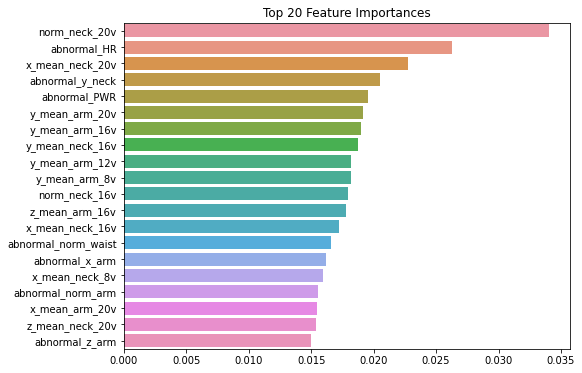

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = estimator5.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

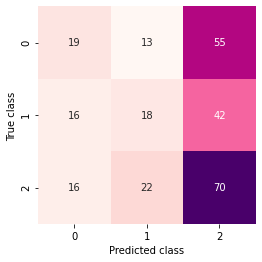

In [118]:
# 混同行列を作成
matrix = confusion_matrix(y5_test, pred5)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

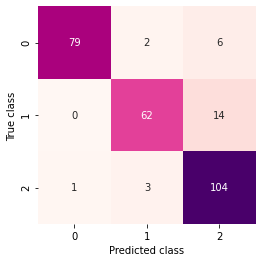

In [121]:
# 混同行列を作成
matrix1 = confusion_matrix(y_test, pred5_1)
# 混同行列を表示
sns.heatmap(matrix1, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

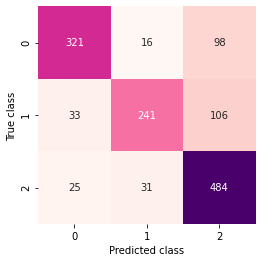

In [122]:
# 混同行列を作成
matrix2 = confusion_matrix(y, pred5_2)
# 混同行列を表示
sns.heatmap(matrix2, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()

In [120]:
data6 = pd.read_csv('data_41.csv')

X6 = data6.drop(['label'],axis=1)
y6 = data6['label']

In [124]:
(X6_train, X6_test, y6_train, y6_test) = train_test_split(X6,y6,test_size=0.20275, shuffle=False , random_state=0)

In [125]:
rf6 = RandomForestClassifier(random_state=0, n_jobs=-1)

In [126]:
print(X6_test)

      abnormal_x_arm  abnormal_y_arm  abnormal_z_arm  abnormal_norm_arm  \
1159        0.000025        0.000013        0.000012           0.000002   
1160        0.000002        0.000020        0.000020           0.000003   
1161        0.000003        0.000019        0.000020           0.000003   
1162        0.000003        0.000018        0.000020           0.000003   
1163        0.000003        0.000018        0.000020           0.000003   
...              ...             ...             ...                ...   
1450        0.000000        0.000000        0.000000           0.000000   
1451        0.000000        0.000000        0.000000           0.000000   
1452        0.000000        0.000000        0.000000           0.000000   
1453        0.000000        0.000000        0.000000           0.000000   
1454        0.000000        0.000000        0.000000           0.000000   

      abnormal_x_neck  abnormal_y_neck  abnormal_z_neck  abnormal_norm_neck  \
1159         0.00000

In [127]:
grid_cv6 = GridSearchCV(rf6, param_grid=params, cv=4, n_jobs=-1)
grid_cv6.fit(X6_train, y6_train)

print('最適ハイパーパラメータ :',grid_cv6.best_params_)
print('最適精度 :',grid_cv6.best_score_)

最適ハイパーパラメータ : {'max_depth': 16, 'min_samples_leaf': 48, 'min_samples_split': 180, 'n_estimators': 100}
最適精度 : 0.40293222765779735


In [128]:
estimator6 = grid_cv6.best_estimator_
estimator6.fit(X6_train, y6_train)

pred6 = estimator6.predict(X6_test)
print('精度:{0:.4f}'.format(accuracy_score(y6_test,pred6)))

pred6_1 = estimator6.predict(X_test)
print('精度1:{0:.4f}'.format(accuracy_score(y_test,pred6_1)))

精度:0.3547
精度1:0.4983


In [129]:
import sys
import time

# 変数重要度
for i in range(0,X.shape[1]):
    print(X.columns[i],estimator6.feature_importances_[i])

program_start = time.time()
now = str(int(program_start))

df6 = pd.DataFrame(estimator6.feature_importances_)
df6.to_csv("feature_importances"+ now +".csv")

abnormal_x_arm 0.0493082163778249
abnormal_y_arm 0.036437002178257745
abnormal_z_arm 0.06395396866340626
abnormal_norm_arm 0.02124655098367023
abnormal_x_neck 0.036511745089781604
abnormal_y_neck 0.03755998892765299
abnormal_z_neck 0.021112590027566384
abnormal_norm_neck 0.01886676569134184
abnormal_x_waist 0.01808921691790029
abnormal_y_waist 0.029465785898886973
abnormal_z_waist 0.018891534005974653
abnormal_norm_waist 0.027147171726376283
abnormal_PWR 0.05049402215801899
abnormal_HR 0.0532164508148436
x_mean_arm 0.0066636919717097225
y_mean_arm 0.0
z_mean_arm 0.006762575998486275
norm_arm 0.011129646206573333
x_mean_neck 0.002936394847161602
y_mean_neck 0.001901841684733885
z_mean_neck 0.0021264799425237315
norm_neck 0.004014322698205848
x_mean_neck.1 0.005845808097458205
y_mean_neck.1 0.0020673368897407584
z_mean_neck.1 0.004608560047456534
norm_neck.1 0.010669138471386237
PWR 0.008677093599081559
HR 0.009934008147012875
x_mean_arm_1 0.0028674677691930385
y_mean_arm_1 0.00747423299

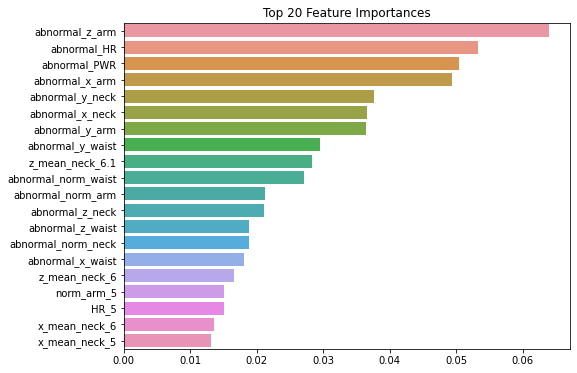

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = estimator6.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

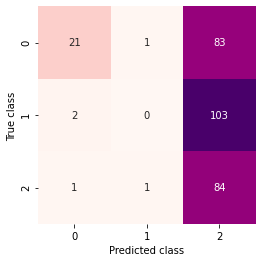

In [131]:
# 混同行列を作成
matrix = confusion_matrix(y6_test, pred6)
# 混同行列を表示
sns.heatmap(matrix, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.show()